In [ ]:
#Can we predict the risk of a bone fracture based on age, alcohol, and calcium levels?

In [8]:

# Install dependencies
!pip install pandas openpyxl scikit-learn matplotlib seaborn

#  Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load Excel file
file_path = "/content/WM_SAT_Emp_Population_Output_UIW_20221003(2).xlsx"

# Load required sheets
fracture_df = pd.read_excel(file_path, sheet_name='Fracture_pop')
alcohol_df = pd.read_excel(file_path, sheet_name='ETOH_pop')
calcium_df = pd.read_excel(file_path, sheet_name='calcium_pop')
target_df = pd.read_excel(file_path, sheet_name='Target_population')




In [9]:
# Clean and prepare data

# Fracture data
fracture_df['Fracture_Risk'] = 1
fracture_df = fracture_df[['anon_id', 'Fracture_Risk']]

# Alcohol data
alcohol_df['Alcohol'] = 1
alcohol_df = alcohol_df[['anon_id', 'Alcohol']]

# Calcium data
calcium_df = calcium_df[['anon_id', 'calcium_val']]
calcium_df['calcium_val'] = pd.to_numeric(calcium_df['calcium_val'], errors='coerce')

# Age data
target_df = target_df[['anon_id', 'member_age']].rename(columns={'member_age': 'Age'})

<ipython-input-9-b62fb7b7236b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calcium_df['calcium_val'] = pd.to_numeric(calcium_df['calcium_val'], errors='coerce')


In [10]:
# Merge all data
merged = target_df.merge(fracture_df, on='anon_id', how='left')\
                  .merge(alcohol_df, on='anon_id', how='left')\
                  .merge(calcium_df, on='anon_id', how='left')

# Fill and clean
merged['Fracture_Risk'] = merged['Fracture_Risk'].fillna(0)
merged['Alcohol'] = merged['Alcohol'].fillna(0)
merged = merged.dropna(subset=['calcium_val', 'Age'])

In [11]:
#  Prepare ML features and labels
X = merged[['Age', 'Alcohol', 'calcium_val']]
y = merged['Fracture_Risk']
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4160   13]
 [ 319    3]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      4173
         1.0       0.19      0.01      0.02       322

    accuracy                           0.93      4495
   macro avg       0.56      0.50      0.49      4495
weighted avg       0.88      0.93      0.89      4495



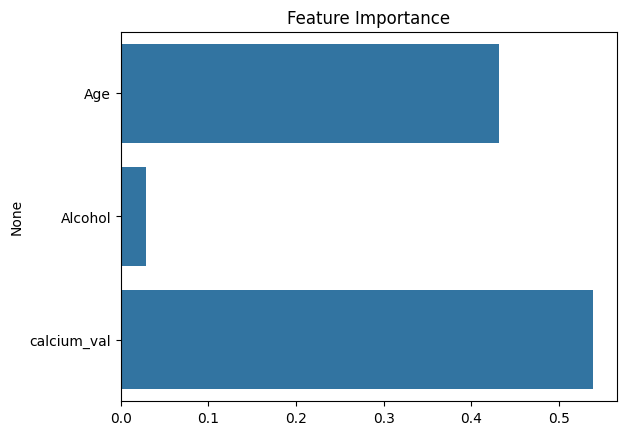

In [12]:
# Feature importance
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()

Results: Accuracy (93%) is misleading — the model is just very good at guessing “no fracture” because fractures are rare.

Recall for fractures (class 1) is 0.00: it fails to detect nearly all fracture cases.

Precision for fractures (0.07): when it does predict a fracture, it's wrong most of the time.

F1-score for fracture class is 0.01: very poor.


What does this mean
Your model is not currently useful for predicting bone fractures.

Why?

    It is heavily biased toward the majority class (non-fracture).

    The class imbalance (4173 vs. 322) causes the model to "learn" that saying "no fracture" is almost always correct.

How to improve my question: nclude more features:

    Bone density scores (DEXA)

    Fall history

    Medication use (like steroids)

    Gender, BMI, smoking, Vitamin D levels

Question: Can we predict the risk of a bone fracture based on age, alcohol, and calcium levels?

Answer:

    Based on current results, we are not yet able to accurately predict bone fractures using only age, alcohol use, and calcium levels. While the model performs well in identifying individuals who are not at risk, it fails to detect most actual fracture cases. This is likely due to the severe class imbalance and the limited scope of predictive features. To improve prediction, additional clinical risk factors and better handling of imbalanced data are needed.